In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Mounted at /content/drive


# **Losses**

In [4]:
def plot_losses(history):
    # Crea una figura con due subplot affiancati
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Primo subplot per le loss
    ax1.plot(history['train_loss'], label='train_loss')
    ax1.plot(history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Secondo subplot per l'accuracy
    ax2.plot(history['train_acc'], label='train_acc')
    ax2.plot(history['val_acc'], label='val_acc')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    # Aggiunge un po' di spazio tra i subplot per evitare sovrapposizioni
    plt.tight_layout()

    # Mostra il grafico
    plt.show()

## **U-Net**

### **Base U-Net**

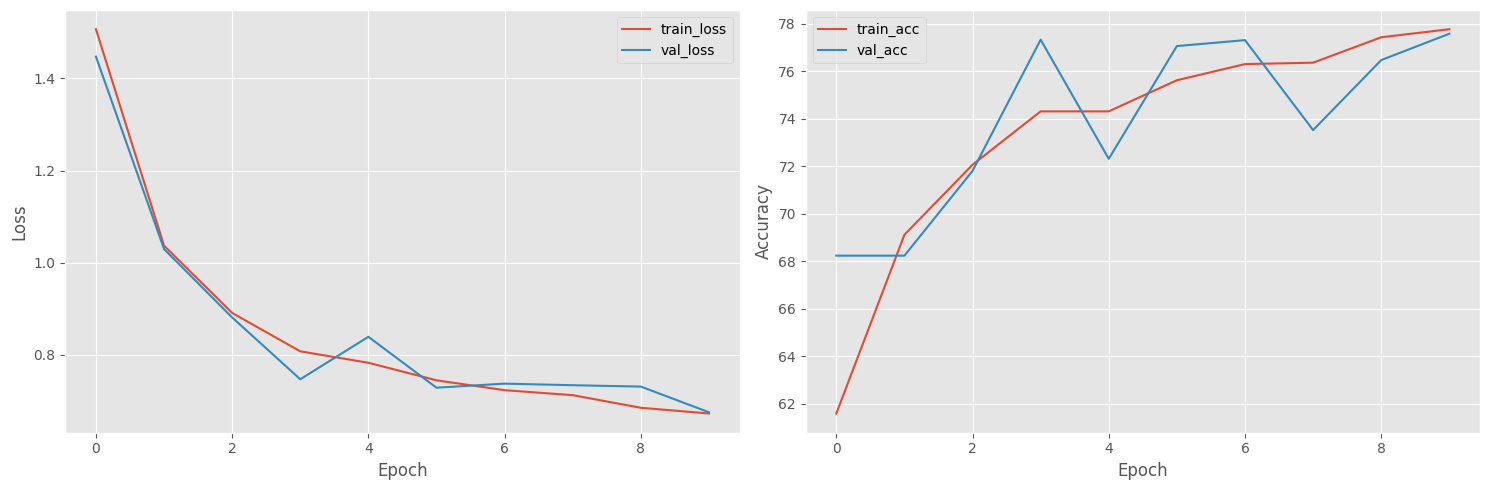

In [5]:
history = {
    'train_loss': [1.5066, 1.0370, 0.8910, 0.8077, 0.7829, 0.7448, 0.7234, 0.7126, 0.6852, 0.6728],
    'val_loss': [1.4472, 1.0296, 0.8812, 0.7471, 0.8392, 0.7288, 0.7376, 0.7342, 0.7312, 0.6755],
    'train_acc': [61.59, 69.12, 72.07, 74.32, 74.32, 75.63, 76.31, 76.37, 77.44, 77.78],
    'val_acc': [68.24, 68.24, 71.81, 77.34, 72.32, 77.07, 77.32, 73.53, 76.48, 77.59]
}

plot_losses(history)

### **Small U-Net**

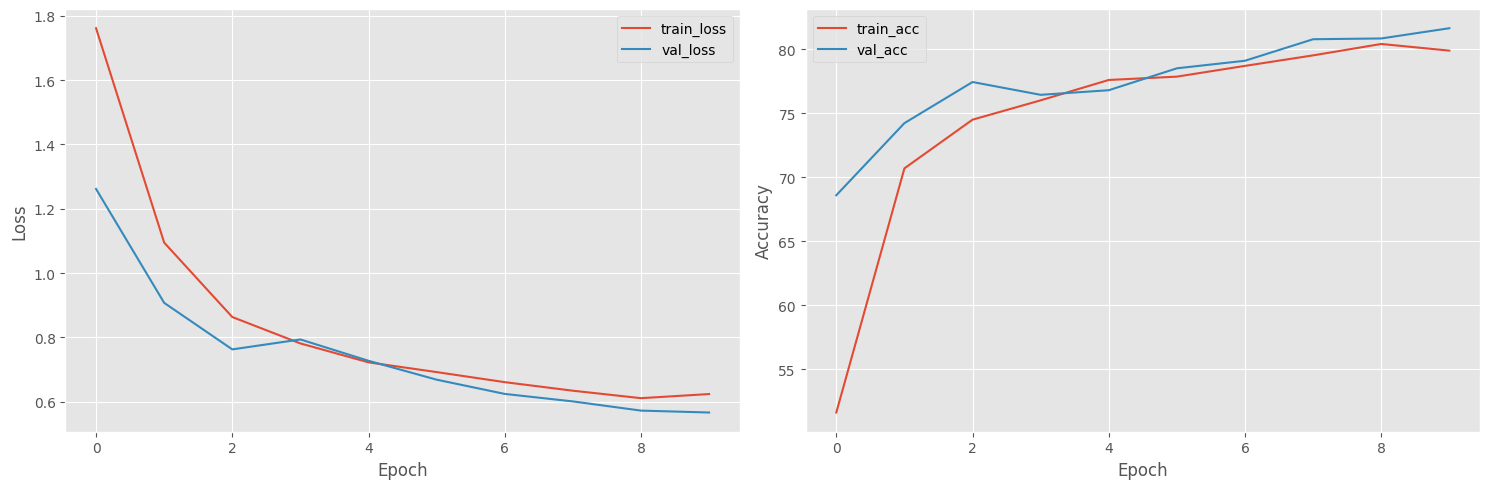

In [6]:
history = {
    'train_loss': [1.7613, 1.0946, 0.8631, 0.7810, 0.7222, 0.6919, 0.6606, 0.6340, 0.6108, 0.6236],
    'val_loss': [1.2614, 0.9072, 0.7625, 0.7934, 0.7270, 0.6683, 0.6240, 0.6007, 0.5721, 0.5662],
    'train_acc': [51.64, 70.70, 74.50, 76.01, 77.60, 77.86, 78.70, 79.52, 80.41, 79.89],
    'val_acc': [68.60, 74.23, 77.44, 76.44, 76.80, 78.51, 79.10, 80.78, 80.84, 81.64]
}

plot_losses(history)

## **SegNet**

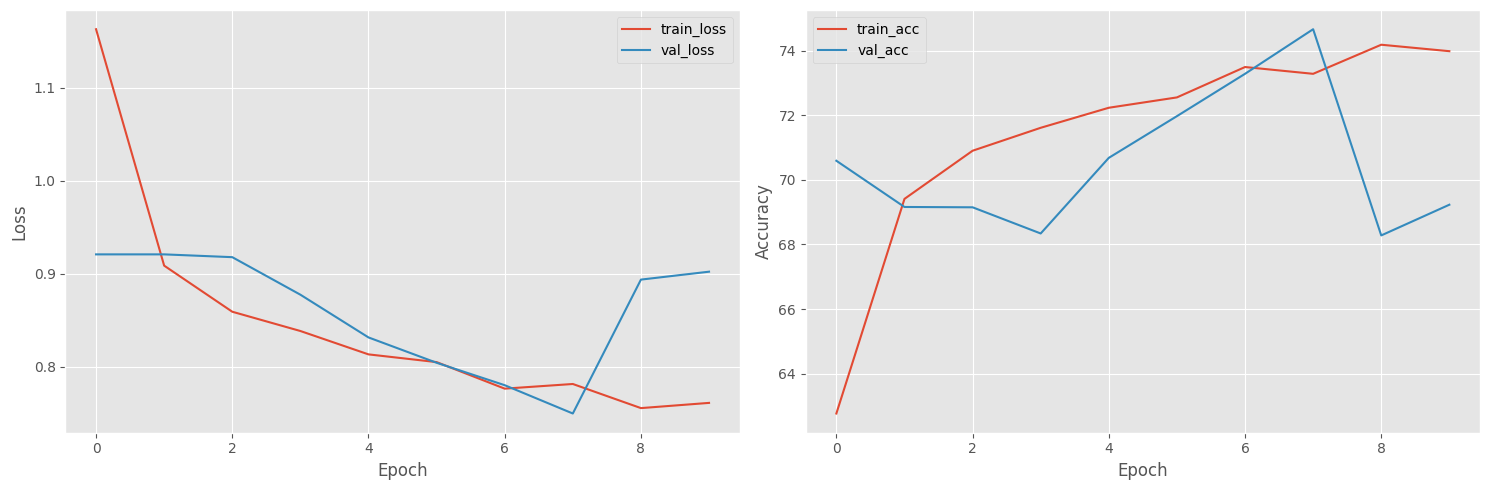

In [7]:
history = {
    'train_loss': [1.1626, 0.9087, 0.8592, 0.8385, 0.8134, 0.8051, 0.7766, 0.7816, 0.7557, 0.7613],
    'val_loss': [0.9208, 0.9208, 0.9178, 0.8775, 0.8316, 0.8044, 0.7803, 0.7499, 0.8937, 0.9022],
    'train_acc': [62.77, 69.41, 70.90, 71.61, 72.23, 72.55, 73.49, 73.28, 74.18, 73.98],
    'val_acc': [70.59, 69.16, 69.15, 68.34, 70.68, 71.97, 73.28, 74.66, 68.28, 69.23]
}

plot_losses(history)

## **DeepLab**

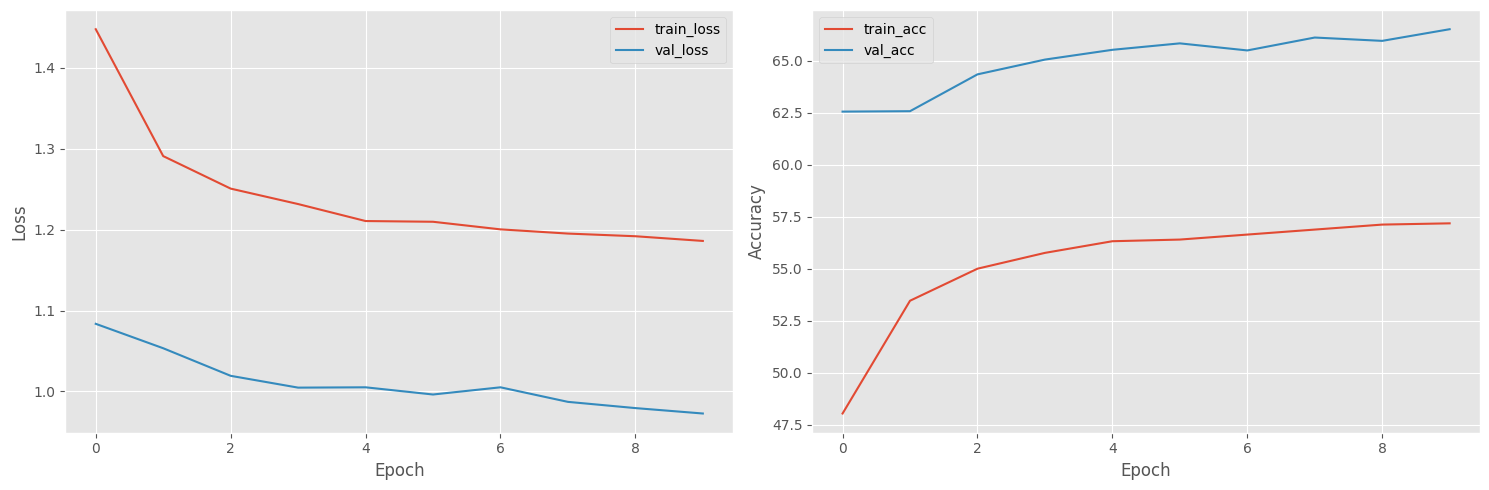

In [8]:
history = {
    'train_loss': [1.4479, 1.2910, 1.2508, 1.2317, 1.2107, 1.2098, 1.2004, 1.1952, 1.1919, 1.1861],
    'val_loss': [1.0836, 1.0534, 1.0193, 1.0047, 1.0051, 0.9962, 1.0051, 0.9871, 0.9794, 0.9727],
    'train_acc': [48.05, 53.47, 55.01, 55.77, 56.33, 56.41, 56.65, 56.89, 57.13, 57.19],
    'val_acc': [62.56, 62.58, 64.35, 65.06, 65.53, 65.84, 65.50, 66.12, 65.96, 66.52]
}

plot_losses(history)

# **Evaluation**

## **Original Dataset**

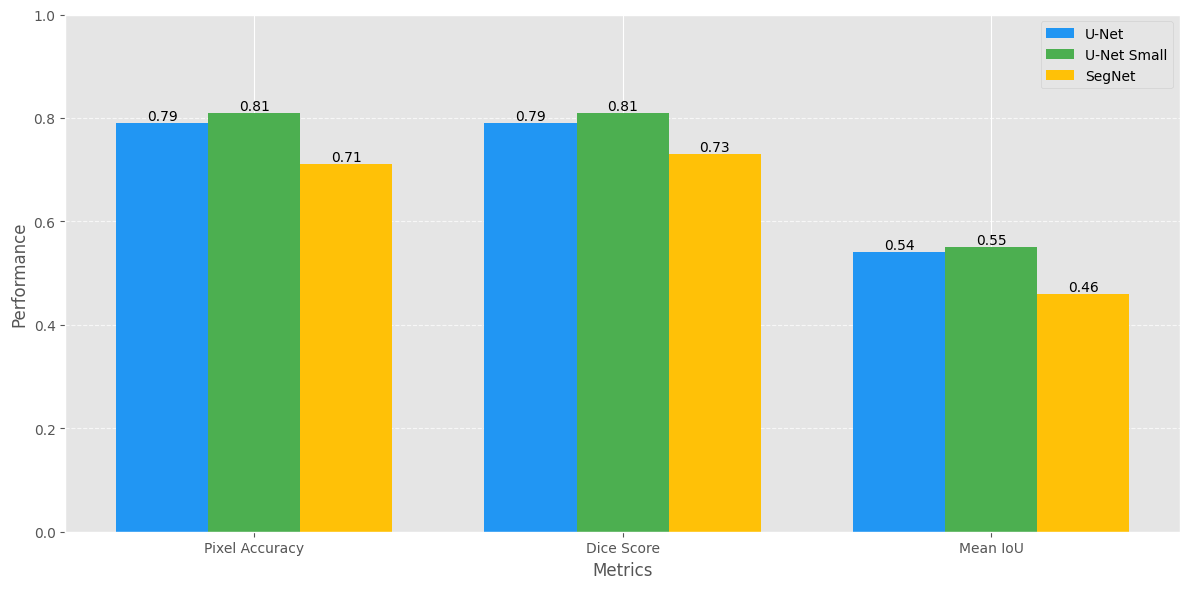

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Dati di esempio
labels = ['U-Net', 'U-Net Small', 'SegNet']
leggenda = ['Pixel Accuracy', 'Dice Score', 'Mean IoU']

values = np.array([
    [0.79, 0.79, 0.54],
    [0.81, 0.81, 0.55],
    [0.71, 0.73, 0.46]
])

values = values.transpose()

# Impostazioni del plot
x = np.arange(len(labels))  # Posizione dei gruppi
width = 0.25  # Larghezza delle barre

fig, ax = plt.subplots(figsize=(12, 6))

# Creazione delle barre per ogni metrica
bars1 = ax.bar(x - width, values[:, 0], width, label=labels[0], color='#2196F3')
bars2 = ax.bar(x, values[:, 1], width, label=labels[1], color='#4CAF50')
bars3 = ax.bar(x + width, values[:, 2], width, label=labels[2], color='#FFC107')

# Aggiunta dei valori sopra le barre
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.2f}',
                ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

# Personalizzazione del grafico
ax.set_ylabel('Performance')
ax.set_xlabel('Metrics')
# ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(leggenda)
ax.legend()

# Aggiunta della griglia
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1.0)

# Aggiustamento del layout
plt.tight_layout()

plt.show()

## **Augmented Dataset**

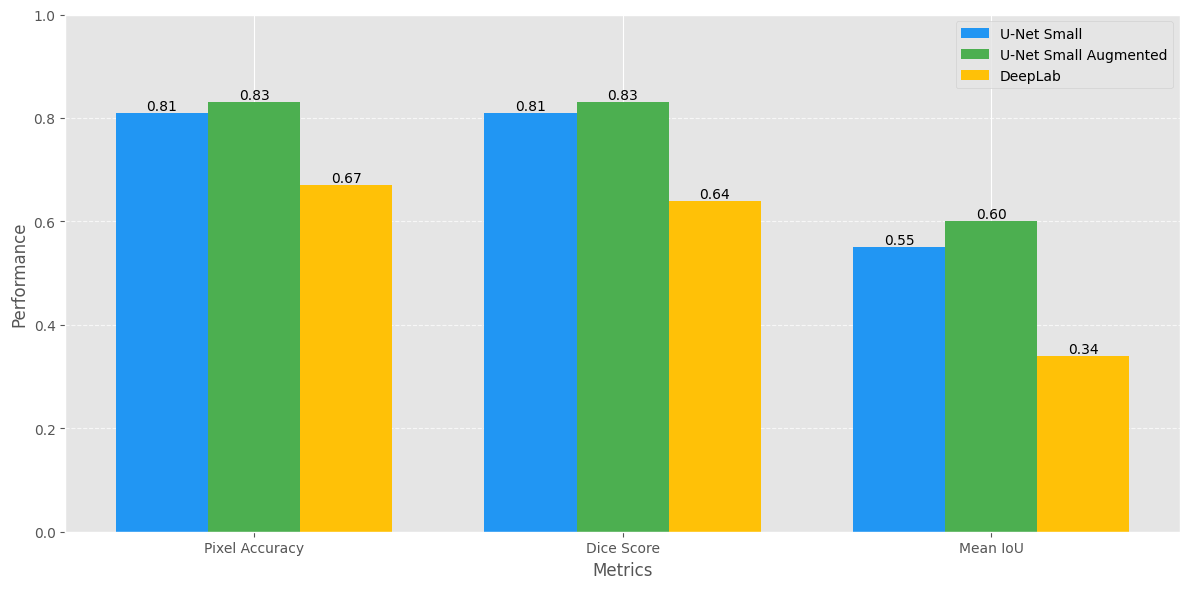

In [10]:
# Dati di esempio
labels = ['U-Net Small', 'U-Net Small Augmented', 'DeepLab']
leggenda = ['Pixel Accuracy', 'Dice Score', 'Mean IoU']

values = np.array([
    [0.81, 0.81, 0.55],
    [0.83, 0.83, 0.60],
    [0.67, 0.64, 0.34]
])

values = values.transpose()

# Impostazioni del plot
x = np.arange(len(labels))  # Posizione dei gruppi
width = 0.25  # Larghezza delle barre

fig, ax = plt.subplots(figsize=(12, 6))

# Creazione delle barre per ogni metrica
bars1 = ax.bar(x - width, values[:, 0], width, label=labels[0], color='#2196F3')
bars2 = ax.bar(x, values[:, 1], width, label=labels[1], color='#4CAF50')
bars3 = ax.bar(x + width, values[:, 2], width, label=labels[2], color='#FFC107')

# Aggiunta dei valori sopra le barre
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.2f}',
                ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

# Personalizzazione del grafico
ax.set_ylabel('Performance')
ax.set_xlabel('Metrics')
# ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(leggenda)
ax.legend()

# Aggiunta della griglia
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1.0)

# Aggiustamento del layout
plt.tight_layout()

plt.show()